# 第一次实验——KNN实现手写数字识别

#### 姓名：任薏霖
#### 学号：2011897
#### 专业：物联网工程

### 导入所需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import pandas as pd

### 导入数据集semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    data = open(fileName)
    s = data.readlines()
    l = len(s)
    data.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = s[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11128\1655242787.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

### 基本要求
####  编程实现kNN算法：采用留一法给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度


In [4]:
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as lrs

In [5]:
def MyKnnClassifier(data_X, data_y, neighbors):
    # 生成数据集和测试集
    #X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    avg_acc = 0
    loo = LeaveOneOut()
    for train, test in loo.split(X,y):
        X_train, X_test, y_train, y_test = X[train], X[test],y [train], y[test]
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0]     # 获得测试集的大小
        testRes = []  # 存放测试结果
        acc = 0   # 计算准确率

        for i in range(testShape):  # 针对测试集中每一个样本进行预测
            # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
            testDiffMat = np.tile(X_test[i],(trainShape , 1)) - X_train
            sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
            # 方差距离为方差矩阵的整行求和，是一个一位列向量
            sqTestDiffDis = sqTestDiffMat.sum(axis=1)
            testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
            sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
            labelCount = []
            for j in range(neighbors):  # 考察k近邻属于哪些类
                labelCount.append(y_train[sortIndex[j]][0])
            classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
            classifyRes = classifyRes.most_common(2)[0][0]
            testRes.append(classifyRes)
            if classifyRes == y_test[i]:  # 分类正确则将accRate+1
                acc += 1
                
        avg_acc += acc
    accRate = avg_acc / 1593
    #print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors, X_test.shape[0], avg_acc, avg_acc))
    print('k={0}时，准确率为：{1}'.format(neighbors, accRate))
    return accRate

#### 实验结果：

In [6]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，准确率为：0.9158819836785939
k=3时，准确率为：0.9190207156308852
k=5时，准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
### 与weka机器学习包中的kNN分类结果进行对比

In [7]:
#通过weka软件进行knn分类
#导入数据
from IPython.display import Image
img1 = 'pic1.png'
Image(url=img1)

In [8]:
#以knn = 1为例，展示weka对手写数字识别的准确率
img2 = 'pic2.png'
Image(url=img2)

####  weka手写数字识别准确率csv文件 

In [9]:
#将weka对手写数字识别的准确率转化为csv文件
#读取csv文件

data = pd.read_csv("wekadata.csv", header=None)

data.head()

,0,1
0,knn,accurate
1,1,0.9165100
2,2,0.8851220
3,3,0.9020720
4,4,0.9077210


#### weka实验结果：

In [10]:
#将csv文件转化为数组
#并进行格式化输出

data_tests = np.array(data[1:]).astype(float)

for i in range(25):
        print('k={0}时，weka训练手写体识别的准确率为：{1}'.format(data_tests[i][0], data_tests[i][1]))

k=1.0时，weka训练手写体识别的准确率为：0.91651
k=2.0时，weka训练手写体识别的准确率为：0.885122
k=3.0时，weka训练手写体识别的准确率为：0.902072
k=4.0时，weka训练手写体识别的准确率为：0.907721
k=5.0时，weka训练手写体识别的准确率为：0.907094
k=6.0时，weka训练手写体识别的准确率为：0.907094
k=7.0时，weka训练手写体识别的准确率为：0.912116
k=8.0时，weka训练手写体识别的准确率为：0.908977
k=9.0时，weka训练手写体识别的准确率为：0.908977
k=10.0时，weka训练手写体识别的准确率为：0.905838
k=11.0时，weka训练手写体识别的准确率为：0.905838
k=12.0时，weka训练手写体识别的准确率为：0.90521
k=13.0时，weka训练手写体识别的准确率为：0.904583
k=14.0时，weka训练手写体识别的准确率为：0.901444
k=15.0时，weka训练手写体识别的准确率为：0.896422
k=16.0时，weka训练手写体识别的准确率为：0.896422
k=17.0时，weka训练手写体识别的准确率为：0.894539
k=18.0时，weka训练手写体识别的准确率为：0.893911
k=19.0时，weka训练手写体识别的准确率为：0.893911
k=20.0时，weka训练手写体识别的准确率为：0.895794
k=21.0时，weka训练手写体识别的准确率为：0.895166
k=22.0时，weka训练手写体识别的准确率为：0.897677
k=23.0时，weka训练手写体识别的准确率为：0.893911
k=24.0时，weka训练手写体识别的准确率为：0.893283
k=25.0时，weka训练手写体识别的准确率为：0.8914


### 高级要求

### 将实验过程结果等图示展出

In [11]:
scores1 = []
scores2 = []

for k in range(1,25):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    
# for k in range(1,25):
#     score2 = KnnClassifier(X, y, k, 1)
#     scores2.append(score2)

pf = pd.read_csv("all_data.csv", usecols=['scores2'])
col = pf["scores2"]
data = np.array(col)
#将weka的数据进行导入
for k in range(1, 25):
    scores2.append(data[k-1])

k=1时，准确率为：0.9158819836785939
k=2时，准确率为：0.9158819836785939
k=3时，准确率为：0.9190207156308852
k=4时，准确率为：0.9196484620213434
k=5时，准确率为：0.9152542372881356
k=6时，准确率为：0.9190207156308852
k=7时，准确率为：0.9221594475831764
k=8时，准确率为：0.9240426867545511
k=9时，准确率为：0.9234149403640929
k=10时，准确率为：0.9196484620213434
k=11时，准确率为：0.9139987445072191
k=12时，准确率为：0.9165097300690521
k=13时，准确率为：0.9171374764595104
k=14时，准确率为：0.9121155053358443
k=15时，准确率为：0.9077212806026366
k=16时，准确率为：0.9077212806026366
k=17时，准确率为：0.9052102950408035
k=18时，准确率为：0.9026993094789705
k=19时，准确率为：0.901443816698054
k=20时，准确率为：0.9008160703075957
k=21时，准确率为：0.901443816698054
k=22时，准确率为：0.903954802259887
k=23时，准确率为：0.9008160703075957
k=24时，准确率为：0.8957940991839297


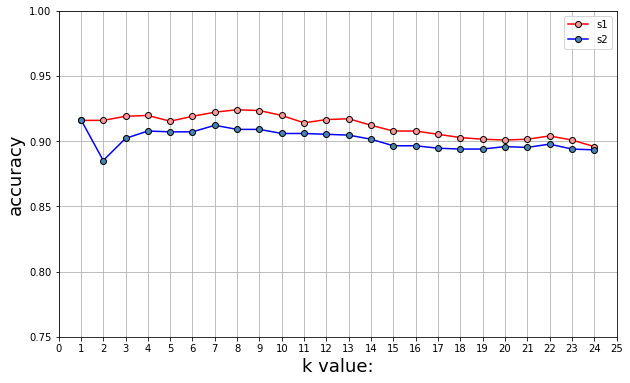

In [15]:
fig = plt.figure(figsize=(10,6))

plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)

x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlim(0, 25)
plt.ylim(0.75, 1)

plt.plot(range(1,25), scores1, 'r', label='s1', marker = "o", markeredgecolor = 'black', markerfacecolor = '#ff9999')
plt.plot(range(1,25), scores2, 'b', label='s2', marker = "o", markeredgecolor = 'black', markerfacecolor = 'steelblue')

plt.legend()

plt.grid()

plt.show()